# Intent Detection 

In [29]:
import torch
from datasets import load_dataset
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [2]:
t1 = torch.randn(1,2)
t2 = torch.randn(1,2).to(device)
print(t1)  # tensor([[-0.2678,  1.9252]])
print(t2)  # tensor([[ 0.5117, -3.6247]], device='cuda:0')

tensor([[-0.9900, -1.0084]])
tensor([[-0.8395, -0.7837]], device='cuda:0')


In [8]:
clinc = load_dataset("clinc_oos","plus")
clinc

Downloading: 8.57kB [00:00, 2.85MB/s]                   
Downloading: 14.4kB [00:00, 7.19MB/s]                   


Downloading: 2.51MB [00:00, 17.3MB/s]
                                

Dataset clinc_oos downloaded and prepared to C:\Users\Subha\.cache\huggingface\datasets\clinc_oos\plus\1.0.0\abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 15250
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

In [12]:
clinc["train"][10]

{'intent': 61, 'text': "how would i say, 'i don't know the answer' in spanish"}

In [13]:
# Here intents are provided as ID's can be converted string
intents = clinc["train"].features["intent"]

In [16]:
intents.int2str(clinc["train"][10]["intent"])

'translate'

In [17]:
train_dataset = clinc['train']
val_dataset = clinc['validation']
test_dataset = clinc['test']

In [20]:
train_dataset

Dataset({
    features: ['text', 'intent'],
    num_rows: 15250
})

In [21]:
train_dataset.column_names

['intent', 'text']

In [22]:
train_dataset.features

{'text': Value(dtype='string', id=None),
 'intent': ClassLabel(num_classes=151, names=['restaurant_reviews', 'nutrition_info', 'account_blocked', 'oil_change_how', 'time', 'weather', 'redeem_rewards', 'interest_rate', 'gas_type', 'accept_reservations', 'smart_home', 'user_name', 'report_lost_card', 'repeat', 'whisper_mode', 'what_are_your_hobbies', 'order', 'jump_start', 'schedule_meeting', 'meeting_schedule', 'freeze_account', 'what_song', 'meaning_of_life', 'restaurant_reservation', 'traffic', 'make_call', 'text', 'bill_balance', 'improve_credit_score', 'change_language', 'no', 'measurement_conversion', 'timer', 'flip_coin', 'do_you_have_pets', 'balance', 'tell_joke', 'last_maintenance', 'exchange_rate', 'uber', 'car_rental', 'credit_limit', 'oos', 'shopping_list', 'expiration_date', 'routing', 'meal_suggestion', 'tire_change', 'todo_list', 'card_declined', 'rewards_balance', 'change_accent', 'vaccines', 'reminder_update', 'food_last', 'change_ai_name', 'bill_due', 'who_do_you_work_f

## Convert Dataset to Dataframe

In [24]:
clinc.set_format(type='pandas')
df = clinc["train"][:]
df.head()

,intent,text
0,61,what expression would i use to say i love you ...
1,61,can you tell me how to say 'i do not speak muc...
2,61,"what is the equivalent of, 'life is good' in f..."
3,61,"tell me how to say, 'it is a beautiful morning..."
4,61,"if i were mongolian, how would i say that i am..."


In [27]:
# convert int2str for all intents
def label_int2str(row,split):
    return clinc[split].features["intent"].int2str(row)

df["intent_name"] = df.intent.apply(label_int2str,split='train')
df.sample(10)

,intent,text,intent_name
6296,131,schedule a time to get my oil changed,schedule_maintenance
12439,15,what do you like doing in your free time,what_are_your_hobbies
7461,48,when is babysitting on my to do list,todo_list
8535,120,inform me as to the plug type of the country,plug_type
301,139,what is regard mean,definition
5361,30,that is erroneous,no
3520,145,can you tell me the best place for cajun shrim...,restaurant_suggestion
14943,49,i wish to know why my card was declined yesterday,card_declined
2713,20,"could you put a stop on my bank account, please",freeze_account
4548,123,when do i need my next oil change,oil_change_when


In [44]:
pd.options.display.max_rows = 160
pd.DataFrame(df.intent_name.value_counts(ascending=False))

,intent_name
oos,250
pin_change,100
account_blocked,100
what_song,100
international_fees,100
last_maintenance,100
meeting_schedule,100
ingredients_list,100
report_fraud,100
measurement_conversion,100


Looks like we have 100 instances for each intent.

## Sentence length of the Queries

In [46]:
df['text_length'] = df.text.str.split().apply(len)

In [48]:
df.text_length.max()

28

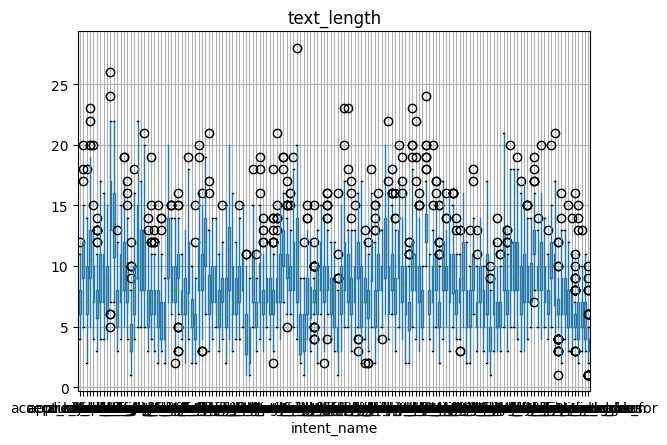

In [52]:
df.boxplot('text_length',by='intent_name')
plt.suptitle('')
plt.show()

The max length of the Sentences is around 28.